In [2]:
import sympy as sp

```
@inbook{allaboutcircuits_semiconductors,
  title = {Semiconductors},
  booktitle = {All About Circuits: Semiconductors},
  chapter = {8},
  url = {https://www.allaboutcircuits.com/textbook/semiconductors/#chpt-8},
  publisher = {EETech Media, LLC},
  year = {2024},
  note = {Accessed: 2024-09-23}
}
```

# Operational Amplifiers

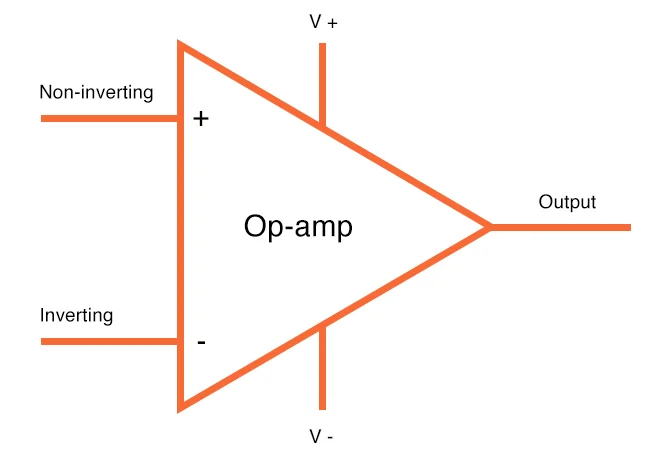


Operational amplifiers, or op-amps, are named because of their ability to perform mathematical *operations* on voltage signals.   
An op-amp is a high-gain voltage amplifier with differential inputs (inverting $V_{-}$ and non-inverting $V_{+}$) and usually a single-ended output $V_{out}$. The key feature of an op-amp is its high gain, which is typically on the order of $10^5$ to $10^6$.

## Ideal Op-Amp Characteristics

In the ideal case, an op-amp has the following characteristics:
- Infinite open-loop gain ($A_{OL} \to \infty$)
- Infinite input impedance ($R_{in} \to \infty$)
- Zero output impedance ($R_{out} \approx 0$)
- Infinite bandwidth ($f_{BW} \to \infty$)
- Zero offset voltage ($V_{offset} \approx 0$)

These characteristics simplify the analysis of op-amp circuits, allowing us to make useful assumptions.


## Open Loop Operation


For an ideal op-amp, the output voltage $V_{out}$ is related to the input voltages by the equation:

$$V_{out} = A_{OL} \cdot (IN_{+} - IN_{-})$$

Where:  
 - $A_{OL}$ : Open Loop Gain.  $A$ is the symbol for gain.
 - $IN_{+}$ (Non-inverting Input): The voltage applied to the non-inverting input terminal of the op-amp. 
 - $IN_{-}$ (Inverting Input): This is the voltage applied to the inverting input terminal of the op-amp. 

In [3]:
IN_plus, IN_minus = sp.symbols('IN_+ IN_-')
V_out, V_in = sp.symbols('V_out V_in')
A_ol = sp.symbols('A_ol')


In [4]:
expr_ol = A_ol * (IN_plus - IN_minus)

sp.Eq(V_out,expr_ol)

Eq(V_out, A_ol*(IN_+ - IN_-))

## Negative Feedback Operation

In many cases, the excessively high gain of an Op-Amp is too temperamental for us to use effectively.  
To overcome this, we can take advantage of the inverting nature of $IN_-$ to reduce the overall gain of the Op-Amp.

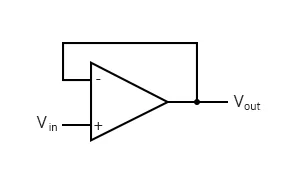

In this configuration, the formula changes slightly:
$$V_{out} = A_{OL} \cdot (IN_{+} - V_{out})$$

In [5]:
f_nf = A_ol * (IN_plus - V_out)
sp.Eq(V_out, f_nf)

Eq(V_out, A_ol*(IN_+ - V_out))

In [6]:
expr = sp.solve(sp.Eq(V_out, f_nf), V_out)[0]
expr

A_ol*IN_+/(A_ol + 1)

Sympy is fighting me here, but this can be further simplified by dividing the expression by $\frac{A}{A}$
$$
\frac{IN_+}{1+\frac{1}{A}}
$$

In [7]:
# V_out close to Voltage in
expr.subs({
    A_ol: 200_000,
    IN_plus: 6
}).evalf()

5.99997000015000

One great advantage in using an op-amp with negative feedback is that the actual voltage gain of the op-amp doesn’t matter, so long as its very large. If the op-amp’s differential gain were 250,000 instead of 200,000, all it would mean is that the output voltage would hold just a little closer to $V_{in}$

### Buffer / Follower

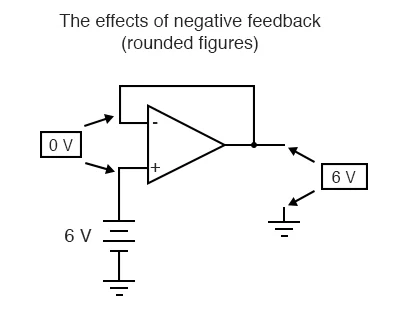

Since this technique effectively causes $A_{ol}$ to cancel itself out, we can use a ___voltage divider___ to create a amplifier of whatever gain we want.

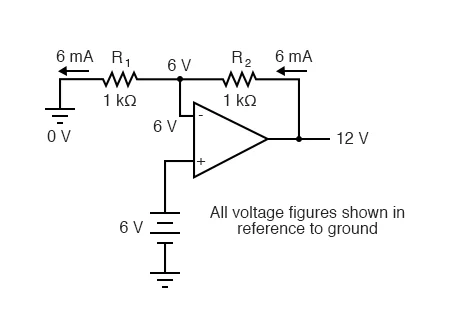

In this example the voltage divider divides by half, resulting in a gain ($A$) of 2:1.  
We can verify this behavior by including the voltage divider in our earlier expressions.

    This results in an expression that is quite messy. Don't worry we'll clean it up soon.

In [8]:
# Voltage Divider
R_1, R_2 = sp.symbols('R_1, R_2')
G = R_1/(R_1+R_2)

sp.Eq(V_out, V_in*G)

Eq(V_out, R_1*V_in/(R_1 + R_2))

In [9]:
# Modifying negative feedback expression to include voltage divider (G)
f_dv = f_nf.subs(V_out, V_out*G)
expr_f_dv = sp.Eq(f_dv, V_out)
expr_f_dv

Eq(A_ol*(IN_+ - R_1*V_out/(R_1 + R_2)), V_out)

In [10]:
# Solve for V_out
expr = sp.solve(expr_f_dv, V_out)[0]
expr

A_ol*IN_+*(R_1 + R_2)/(A_ol*R_1 + R_1 + R_2)

In [11]:
expr.subs({
    A_ol: 2e6,
    IN_plus: 3,
    R_1: 1000,
    R_2: 2000,
})

8.99998650002025

### Simplified formula

As we can see, that value is *very* close to 12.  The reason that the expression is messy is because we are paying attention to the gain of the op-amp.  
To solve this, we'll need to define the output voltage without using $A$:

$$
V_{out} = V_{in} \cdot G^{-1}
$$

In [12]:
expr =  V_in * G**-1
simplified_gain = expr.expand().collect(V_in)
sp.Eq(V_out, simplified_gain)

Eq(V_out, V_in*(1 + R_2/R_1))

In [13]:
simplified_gain.subs({
    V_in: 6,
    R_1: 1e3,
    R_2: 1e3
})

12.0000000000000

### Inverting negative feedback

There's another configuration worth noting when you apply the input voltage ($V_{in}$) to the inverting terminal ($IN_-$) and ground the non-inverting terminal.  
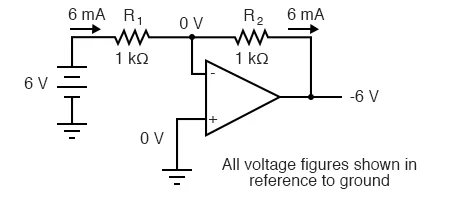

Notice that the Op-Amp holds center of the voltage divider at 0 volts to maintain equilibrium? For this reason, this point is known as *virtual ground*. 

In [14]:
expr_ol = A_ol * (IN_plus - IN_minus)
expr_ol

A_ol*(IN_+ - IN_-)

In [15]:
G = R_1/(R_1+R_2)
G

R_1/(R_1 + R_2)

In [16]:
expr_inverting_amp = expr_ol.subs({
    IN_plus: 0,
    IN_minus: V_in*G - V_out*G
})
expr = sp.Eq(V_out, expr_inverting_amp)
expr

Eq(V_out, -A_ol*(R_1*V_in/(R_1 + R_2) - R_1*V_out/(R_1 + R_2)))

In [17]:
expr = sp.solve(expr, V_out)[0]
expr

A_ol*R_1*V_in/(A_ol*R_1 - R_1 - R_2)

In [18]:
expr.subs({
    A_ol: 2e6,
    R_1: 1e3,
    R_2: 1e3,
    V_in: 6
}).evalf()

6.00000600000600

### Simplified Formula
$$
A = -\frac{R_2}{R_1}
$$

In [19]:
# Still trying to figure out how to derive this ^

# Mathematical Operations with Op-Amps

### Comparison

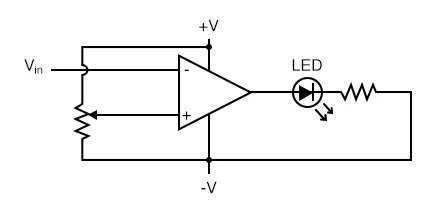

In this setup we take advantage of the high gain of the open-loop operational amplifier. Even a small difference between the inverting and non-inverting terminals will drive the amplifier into saturation.

Effectively $V_{out}$ will be equal to the voltage input ($V_+$ or $V_-$) for whichever input has the more positive voltage.

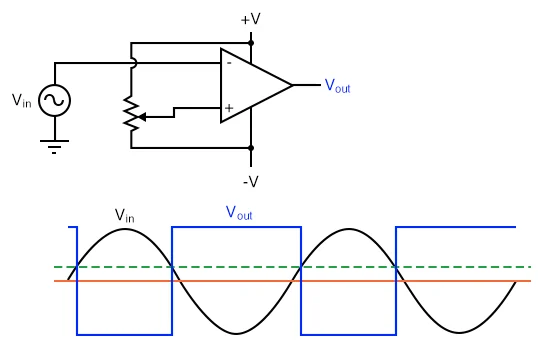  
Here we see the comparator converting an AC analog signal into an inverted square wave.

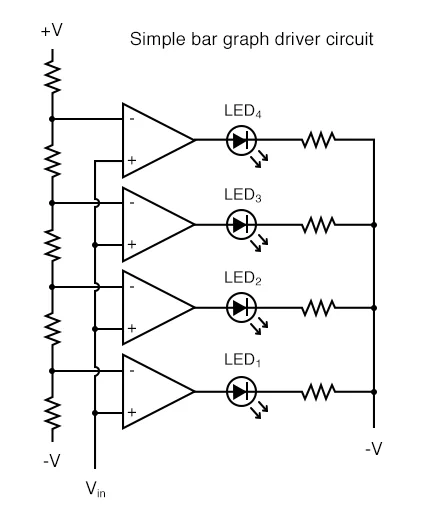  
In this example, an input signal is compared to different points on a voltage divide. As the input signal increases in intensity, successively more LED will light up.

### 1. Passive Averager (Mean)

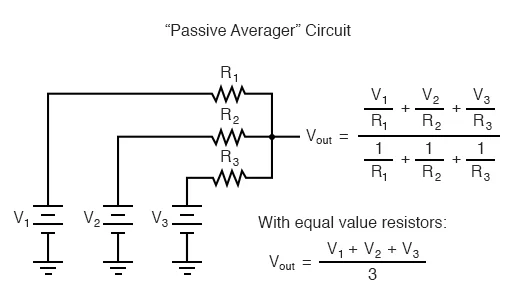

While this circuit doesn't utilize an OP-Amp, it is included here for completion's sake and also as a foundational stepping stone for understanding the Summing OP-Amp later.  

What's going on here is a practical application of Millman's Theorum, which states that when you have a set of parallel voltage sources you can find the equivalent voltage by taking a weighted average depending on each branch's resistances and the total parallel resistance (reciprocal of the sum of reciprocals).  

By making all of the resistors equal with each other you take the "weighted" out of "weighted average" and it simply becomes the average.

**Millman's Theorum**
$$
V_{out} = \frac{\sum_{i=1}^{n} \frac{V_i}{R_i}}{\sum_{i=1}^{n} \frac{1}{R_i}}
$$


### 2. Addition

#### 2.1 Non-inverting Addition

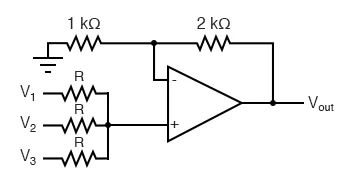

What we see with the summing OP-Amp is a passive averager being used as the input voltage, but we learned earlier that we can control the gain ($A$) by manipulating the ratio of the feedback voltage divider with the formula: 
$$ A = 1 + \frac{R_2}{R_1} $$

In this example, we are using 3 inputs so we've made the gain 3:
$$ \frac{\Sigma_V}{3} \cdot 3  = \Sigma_V$$

#### 2.2 Inverting Addition

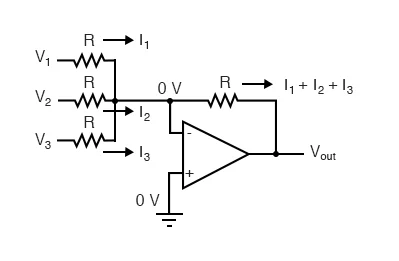

Using a non-inverting OP-Amp to sum voltages can quickly become tedious since you have to adjust the gain to match the number of inputs.  Thankfully, we can do pretty much the same thing with an inverting OP-Amp.

Here, Millman's Theorum isn't applying directly since the inverting terminal's *voltage* is being held at "virtual ground" by the feedback voltage. However, the *current* is still flowing and adding together through the feedback resistance $R_f$.

Here's the formula for this configuration that will apply to any resistor values:
$$V_{out} = -\left(\frac{R_f}{R_1}V_1 + \frac{R_f}{R_2}V_2 + \dots + \frac{R_f}{R_n}V_n\right)$$

However, if all of the resistances are the same, then $\frac{R_f}{R_n} = 1$, which gives us:
$$ V_{out} = - (V_1 + V_2 + \dots + V_n) $$

Note the negative sign on the right side of the equation.  This is an **inverting** amplifier, after all. 

### 3. Differential Amplifier (Subtraction)

#### 3.1 Non-Buffered Diff Amp

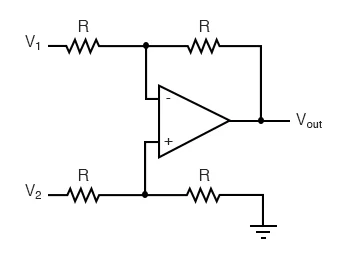

An op-amp without any feedback is already a differential amplifier. It just has such a high gain that the smallest difference gets amplified to saturation.  So to create a usable differential amplifier using an op-amp we need to control the gain in a way that preserves the difference.  Up until now we've been applying loss to only one of the input terminals, but here we are applying loss to both terminals in order to balance out the feedback.

This is also another application of Millman's Theorum, the input is going to be the weighted average of $V_{out}$ and $V_1$. If the resistances are equal, we remove the weighted part and the inverting terminal's voltage ($IN_-$) is:

$$IN_- = \frac{V_1 + V_{out}}{2}$$

Additionally the non-inverting terminal ($IN_+$) has a voltage divider ($G$).  If both resistance are equal then $G = \frac{1}{2}$:

$$ IN_+ = \frac{1}{2} \cdot V_2 $$

Remember that when we apply feedback to the inverting terminal the op-amp is going to hold the voltage to match the input of the non-inverting terminal (observed in the buffer/follower configuration). So what this op-amp is doing looks like this:  

$$ \frac{1}{2}V_1 + \frac{1}{2}V_{out} = \frac{1}{2}V_2 $$

Simply multiply the whole thing by 2 to cancel out the fractions and solve for $V_{out}$ and you get: 

$$V_{out} = V_2 - V_1 $$

#### 3.2 Buffered Diff Amp

Awesome! We've figured out how to control the gain of an op-amp so that it's usable, but it still has a problem.  One of the benefits of an op-amp is its very high input impedance, which the above configuration doesn't take advantage of.  Fortunately we've already seen a configuration of the op-amp that outputs the same voltage that's put into it: the voltage follower (aka. buffer).

We just need to slap a couple of those in-between our op-amp and the input voltages.

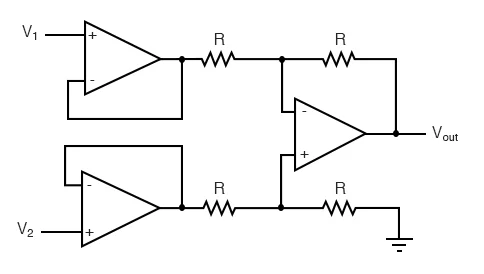

#### 3.3 Instrumentation Diff Amp

Here's one more configuration that builds on the buffered differential op-amp:  
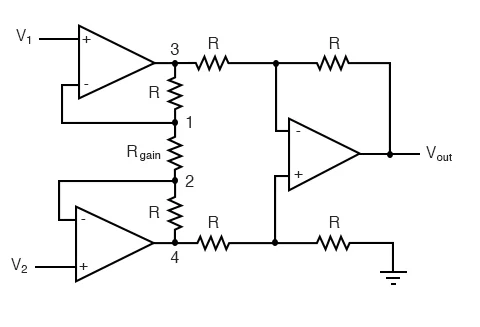

This looks like dark magic, but what's going on here is quite clever. It's a way to adjust the gain of the amplifier simply by changing $R_{gain}$.

- We know that the feedback to the inverting terminals try to equalize with the non-inverting terminals, so node 2 = $V_2$ and node 1 = $V_1$.
- Because it sits between nodes 1 and 2, the voltage across $R_{gain}$ equals the difference between $V_1$ and $V_2$.
- Because ideal op-amps have infinite input impedance, there's near-zero current going into those terminals.
  - That means the current is going through the two resistors connected to $R_gain$
- We now have enough information to know the voltage between nodes 3 and 4:
$$ V_{3-4} = (V_2 - V_1)\left(1+\frac{2R}{R_{gain}}\right) $$

That's where the magic happens.  Instead of feeding the voltages directly into the differential amplifier, we are instead controlling the difference **and then** feeding it to the differential amplifier.  The result of which is an amplifier who's gain we can control with the formula:

$$A_V = 1 + \frac{2R}{R_{gain}}$$

# TODO

These are configurations that I haven't finished studying yet

#### 3. Integrator

An integrator circuit produces an output that is the integral of the input signal with respect to time. This is done by using a capacitor in the feedback loop.

The output voltage of an integrator is given by:

$$V_{out}(t) = -\frac{1}{RC} \int V_{in}(t) \, dt$$

Where $R$ is the input resistor and $C$ is the feedback capacitor.

#### 4. Differentiator

A differentiator circuit produces an output that is the derivative of the input signal with respect to time. This is achieved by placing a capacitor in series with the input signal.

The output voltage of a differentiator is given by:

$$V_{out}(t) = -RC \frac{dV_{in}(t)}{dt}$$

Where $R$ is the feedback resistor and $C$ is the input capacitor.